## Importing Data And Libraries

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

In [3]:
#Defining path
path= r'/Users/prateeksharma/Documents/House prices'

In [4]:
df=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','Exploring relationships.pkl'))

## Data cleaning

In [5]:
df.columns

Index(['City', 'Price', 'Number_Beds', 'Number_Baths', 'Province',
       'Population', 'Latitude', 'Longitude', 'Median_Family_Income',
       'Price_flag', 'Income_flag', 'Population_category', 'Province_short'],
      dtype='object')

In [6]:
df.head()

,City,Price,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income,Price_flag,Income_flag,Population_category,Province_short
0,Toronto,779900,3,2,Ontario,5647656,43.7417,-79.3733,97000,Average price,Mid Income,>=1M,ON
1,Toronto,799999,3,1,Ontario,5647656,43.7417,-79.3733,97000,Average price,Mid Income,>=1M,ON
2,Toronto,799900,2,2,Ontario,5647656,43.7417,-79.3733,97000,Average price,Mid Income,>=1M,ON
3,Toronto,1200000,4,2,Ontario,5647656,43.7417,-79.3733,97000,High price,Mid Income,>=1M,ON
4,Toronto,668800,1,1,Ontario,5647656,43.7417,-79.3733,97000,Average price,Mid Income,>=1M,ON


In [7]:
df.shape

(35759, 13)

In [8]:
#Checking for missing values
df.isnull().sum()

City                    0
Price                   0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
Price_flag              0
Income_flag             0
Population_category     0
Province_short          0
dtype: int64

No missing values

In [9]:
#Finding duplicates 
dups = df.duplicated()
dups.shape

(35759,)

No duplicates 

## Data prep for regression analysis 

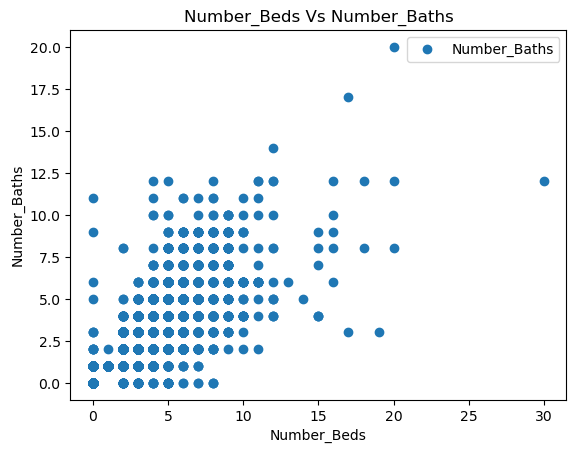

In [10]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'Number_Beds', y='Number_Baths',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number_Beds Vs Number_Baths')  
plt.xlabel('Number_Beds')  
plt.ylabel('Number_Baths')  
plt.show()

## Hypotheses

- Houses with a higher number of bedrooms will also have a higher number of bathrooms.

## Reshaping The Variables into NumPy arrays

In [11]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['Number_Beds'].values.reshape(-1,1)
y = df['Number_Baths'].values.reshape(-1,1)

In [12]:
X

array([[3],
       [3],
       [2],
       ...,
       [2],
       [3],
       [2]])

In [13]:
y

array([[2],
       [1],
       [2],
       ...,
       [2],
       [1],
       [1]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [16]:
regression.fit(X_train, y_train)  # Fit the regression object onto the training set.

LinearRegression()

In [17]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

## Regression Analysis

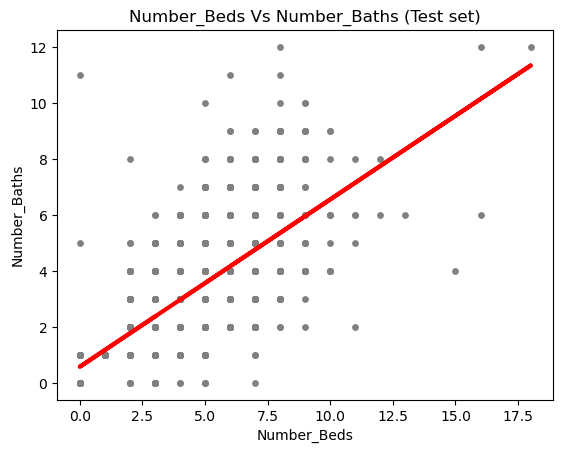

In [18]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number_Beds Vs Number_Baths (Test set)')
plot_test.xlabel('Number_Beds')
plot_test.ylabel('Number_Baths')
plot_test.show()

In [19]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [20]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.59783628]]
Mean squared error:  0.8228003928510503
R2 score:  0.5106764350828734


The slope is approximately 0.598 which means that with the increase in the independent variable, the dependant variable is expected to increase by 0.598. The regression line is quite large at 82.28%

In [21]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4,2.961295
1,3,3.559132
2,1,1.765623
3,0,0.569950
4,2,1.765623
5,2,3.559132
6,3,2.363459
7,4,3.559132
8,2,2.363459
9,5,2.961295


## Compare how the regression fits the training set

In [22]:
# Predict.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [23]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [24]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.59783628]]
Mean squared error:  0.8617179112378069
R2 score:  0.5073289217473883


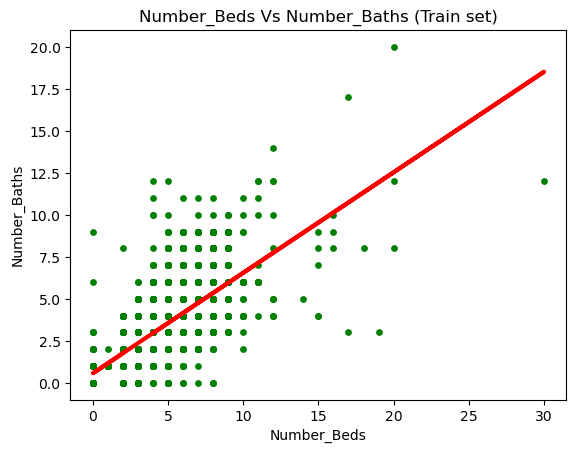

In [25]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number_Beds Vs Number_Baths (Train set)')
plot_test.xlabel('Number_Beds')
plot_test.ylabel('Number_Baths')
plot_test.show()

After comparing the actual and predicted performances of the model, we can see that Test set and training set had very similar slope indicating a positive relationshipe between the variables and mse(Mean squared error) in the test set (0.82) is slightly lower than the train set (0.86) suggesting that the model performs slightly better on the test set. The R2 score in the test set (0.51) is slightly higher than the R2 score in the train set (0.50). A higher R2 score indicates a better fit of the model to the data. Therefore, the model appears to fit the test data slightly better than the train data.